#### Load libraries and data

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Load the iris dataset from sklearn
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### Basic plots

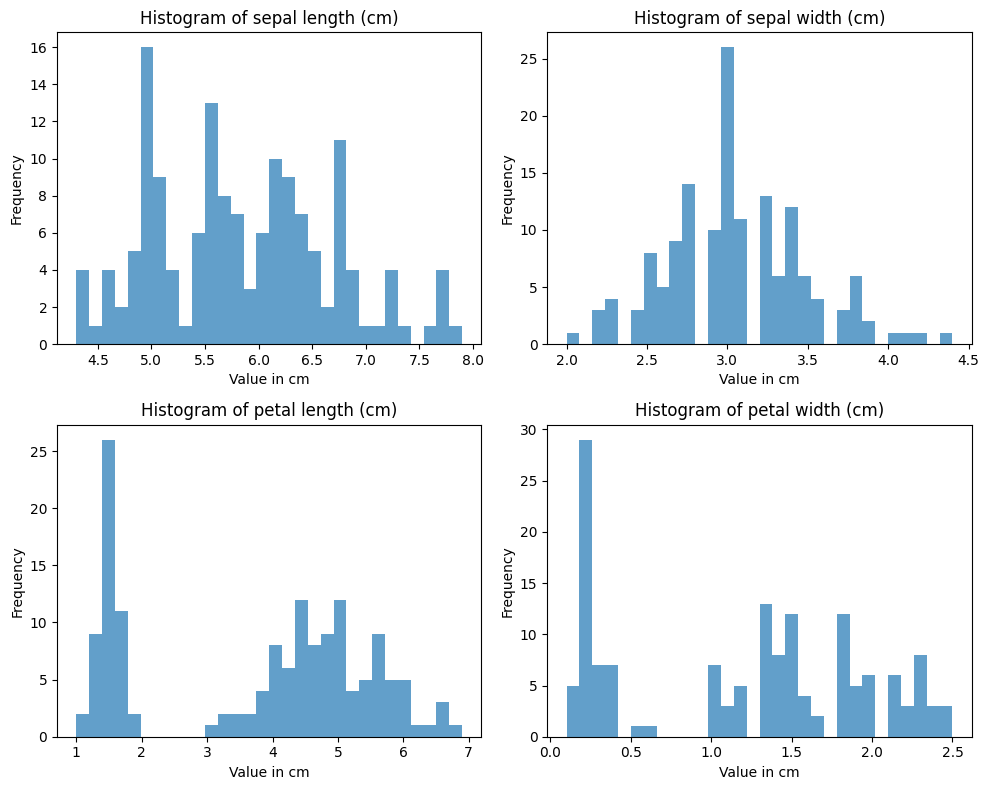

In [16]:
import matplotlib.pyplot as plt

######### histogramas en matriz 2x2

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(df_iris.columns[:-1]):
    axes[i].hist(df_iris[col], bins=30, alpha=0.7, label=col)   
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value in cm') 
    axes[i].set_ylabel('Frequency')
    # axes[i].legend()

plt.tight_layout()
plt.show()

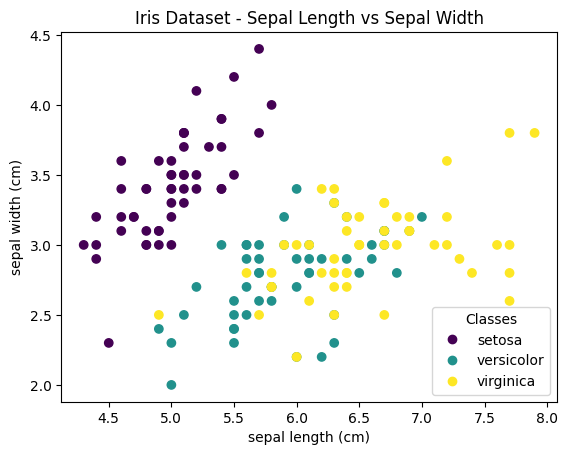

(0.0, 7.0)

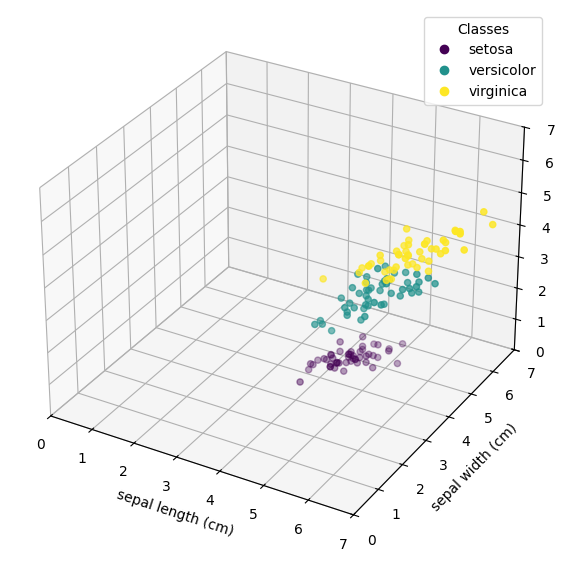

In [13]:
########## Simple scatter plot
_, ax = plt.subplots()
scatter = ax.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], c=df_iris['target'])
ax.set(xlabel=df_iris.columns[0], ylabel=df_iris.columns[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
ax.set_title("Iris Dataset - Sepal Length vs Sepal Width")
plt.show()

########## 3D scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], df_iris.iloc[:, 2], c=df_iris['target'])
ax.set(xlabel=df_iris.columns[0], ylabel=df_iris.columns[1], zlabel=df_iris.columns[2])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes"
)
ax.set_xlim([0, 7])
ax.set_ylim([0,7])
ax.set_zlim([0, 7 ])